In [18]:
import pandas as pd
import networkx as nx
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt

# 1/
df = pd.read_csv('hero-network.csv')  

G = nx.from_pandas_edgelist(df, 'hero1', 'hero2')

G = nx.Graph(G)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degree_sequence = [d for _, d in G.degree()]
avg_degree = sum(degree_sequence) / num_nodes
std_degree = pd.Series(degree_sequence).std()
min_degree = min(degree_sequence)
max_degree = max(degree_sequence)

# Create a DataFrame with degrees
degree_df = pd.DataFrame(G.degree(), columns=['character', 'degree'])

# Sort by degree in ascending order
degree_df_sorted = degree_df.sort_values(by='degree', ascending=True)

# Save to CSV
degree_df_sorted.to_csv('hero_degrees_sorted.csv', index=False)

degree_centrality = nx.degree_centrality(G)
dc_series = pd.Series(degree_centrality)

max_dc = dc_series.idxmax(), dc_series.max()
min_dc = dc_series.idxmin(), dc_series.min()
avg_diff = (dc_series - dc_series.mean()).abs()
close_to_avg = dc_series[avg_diff.nsmallest(3).index].items()

print(f"Network Statistics:")
print(f"Total Nodes: {num_nodes}")
print(f"Total Edges: {num_edges}")
print(f"Average Degree: {avg_degree:.3f}")
print(f"Standard Deviation: {std_degree:.3f}")
print(f"Minimum Degree: {min_degree}")
print(f"Maximum Degree: {max_degree}\n")

print(f"Most Connected: {max_dc[0]} ({max_dc[1]:.5f})")
print(f"Least Connected: {min_dc[0]} ({min_dc[1]:.5f})")
print("\nClose to Average Centrality:")
for char, score in close_to_avg:
    print(f"{char}: {score:.5f}")

Network Statistics:
Total Nodes: 6426
Total Edges: 167219
Average Degree: 52.045
Standard Deviation: 113.658
Minimum Degree: 1
Maximum Degree: 1908

Most Connected: CAPTAIN AMERICA (0.29696)
Least Connected: AZRAEL (0.00016)

Close to Average Centrality:
JONES, TAMMY ANNE: 0.00809
JONES, LORRAINE LORR: 0.00809
JONES, DANIEL DANNY: 0.00809


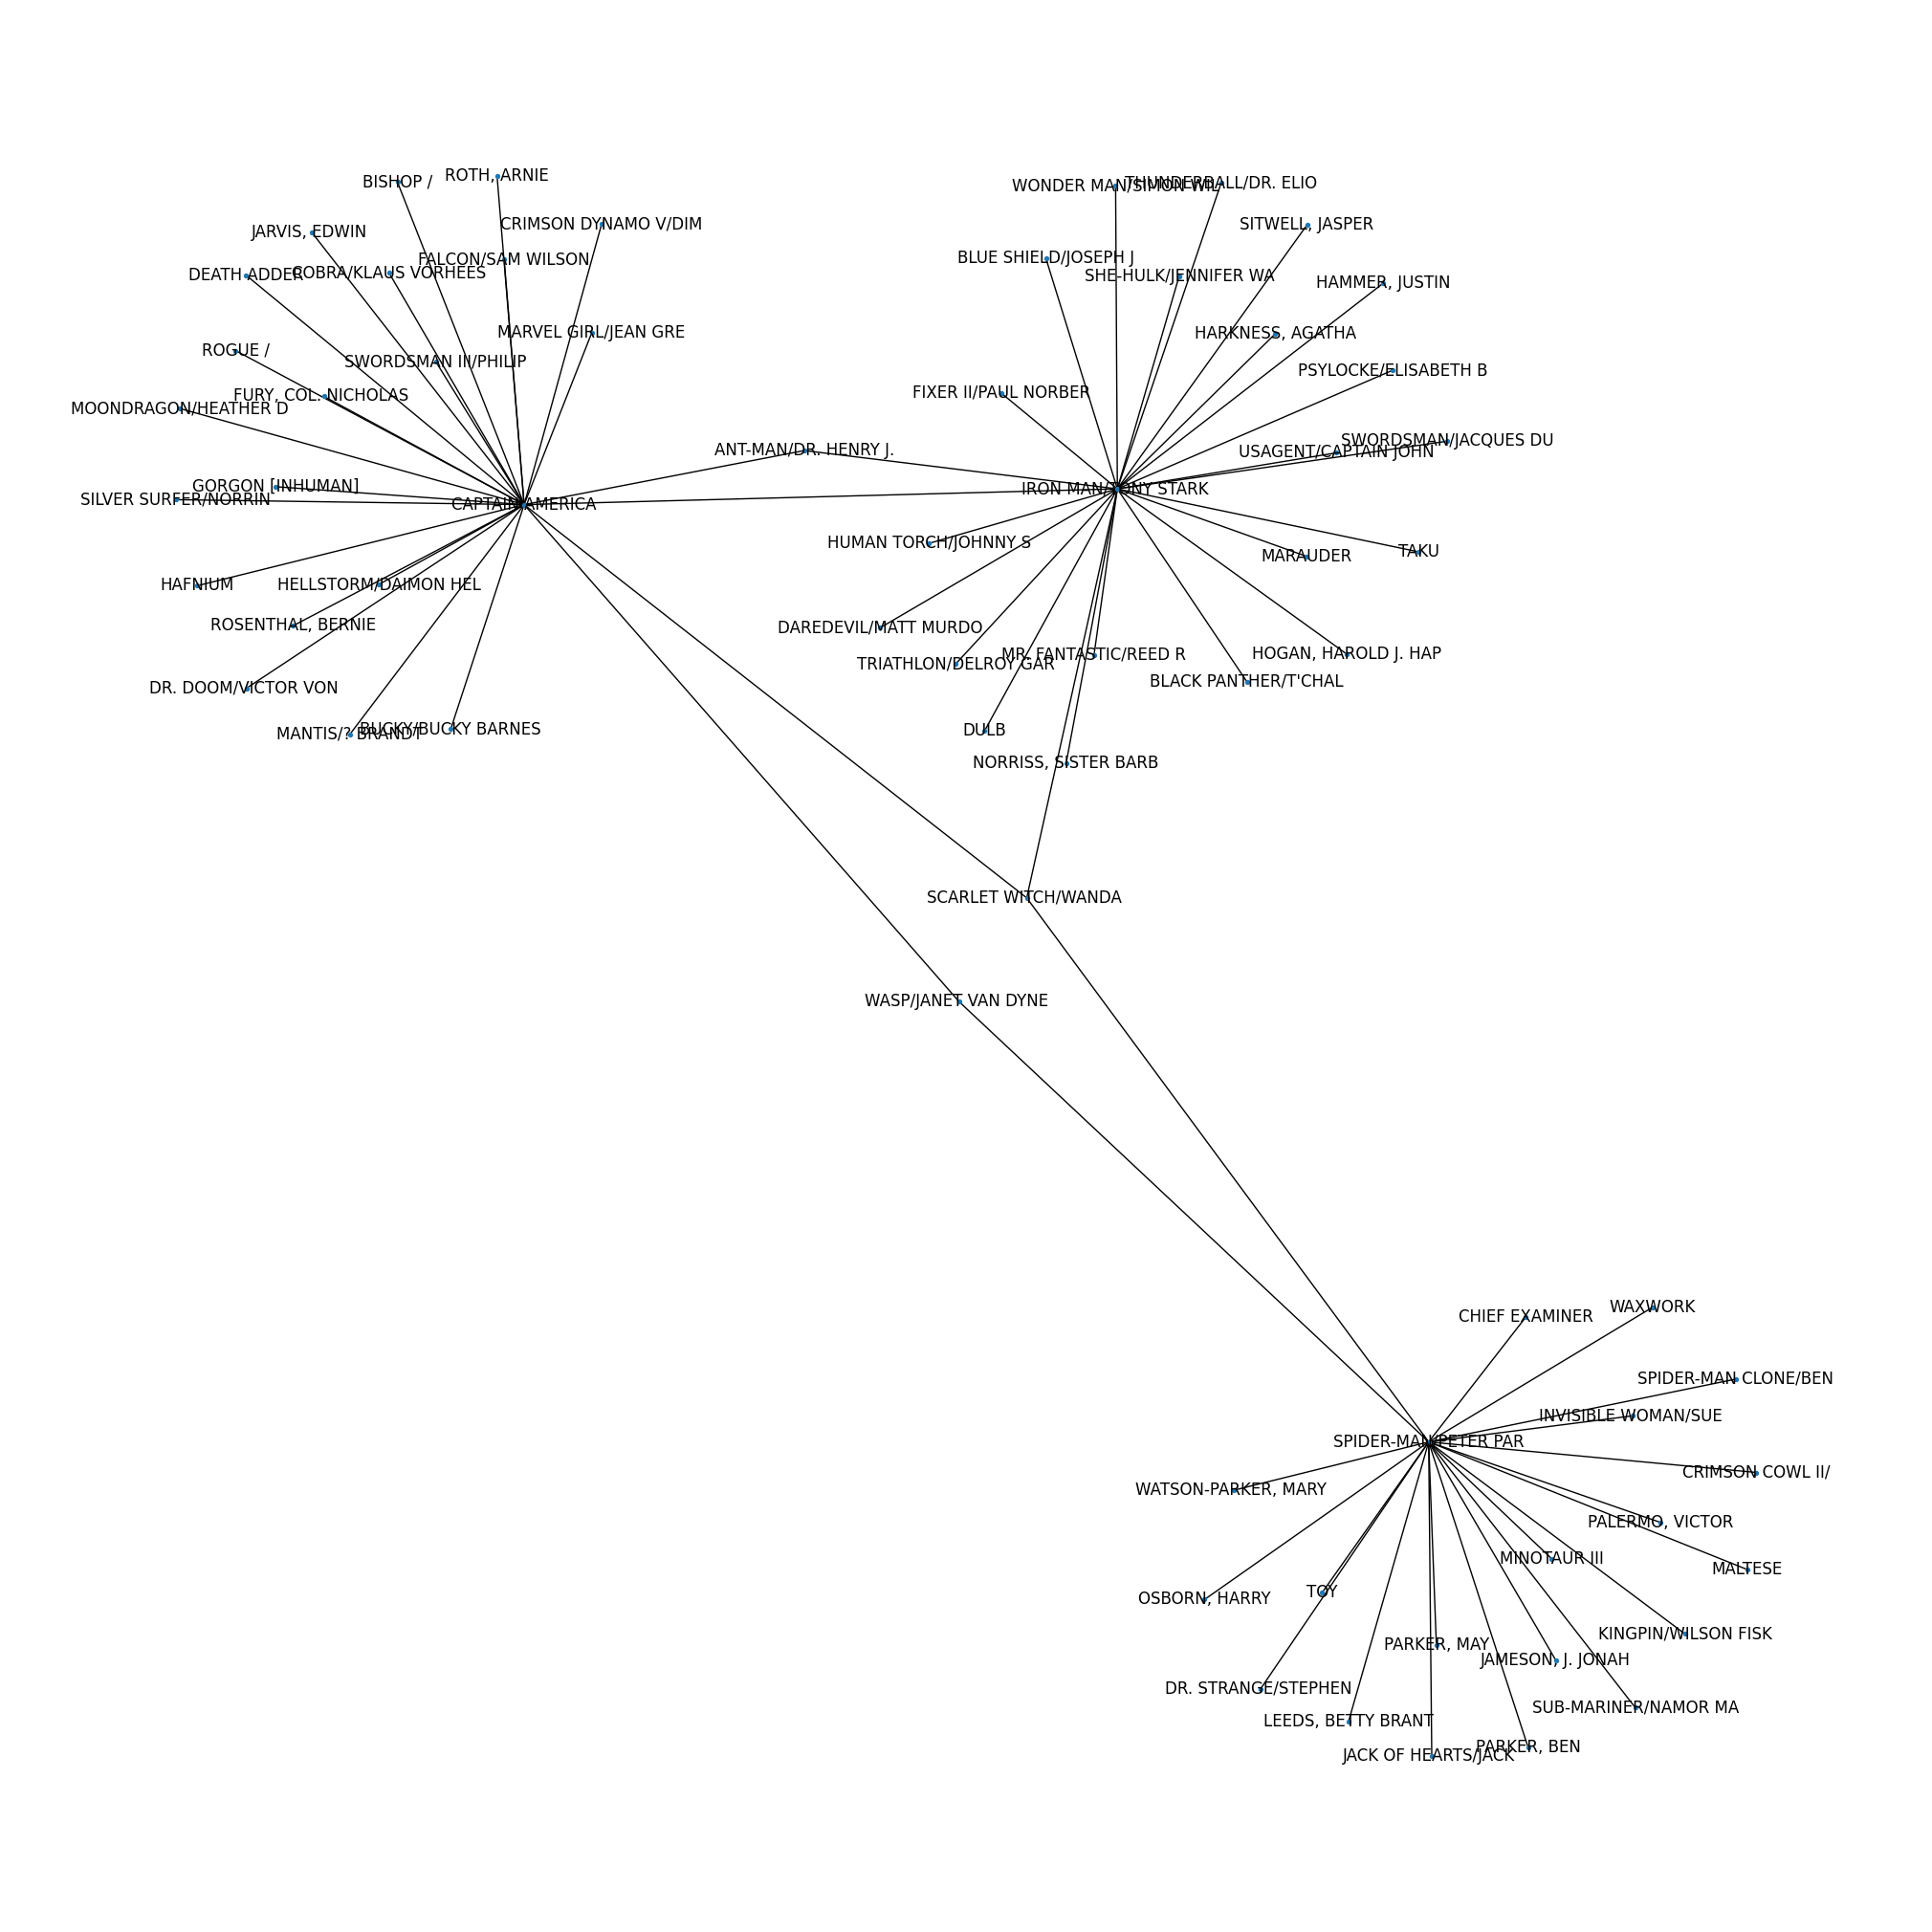

In [19]:
SpiderMan = df[df['hero1']=='SPIDER-MAN/PETER PAR'].sample(25)
Cap = Subset = df[df['hero1']=='CAPTAIN AMERICA'].sample(25)
IronMan = df[df['hero1'].str.contains('IRON MAN/TONY STARK')].sample(25)

Subset = pd.concat([SpiderMan,Cap,IronMan],axis = 0)

G1=nx.from_pandas_edgelist(Subset, 'hero1', 'hero2')
plt.figure(figsize = (20,20))
nx.draw(G1, with_labels=True, node_size = 8)
plt.show()

In [20]:
# 2/
deg_dict = dict(G.degree())

degree_to_nodes = {}
for node, deg in deg_dict.items():
    degree_to_nodes.setdefault(deg, []).append(node)

results = []
for k, nodes in sorted(degree_to_nodes.items()):
    if len(nodes) < 2:
        continue

    dists = []
    for u, v in combinations(nodes, 2):
        try:
            d = nx.shortest_path_length(G, source=u, target=v)
            dists.append(d)
        except nx.NetworkXNoPath:
            pass

    if len(dists) > 0:
        avg_dist = np.mean(dists)
        var_dist = np.var(dists, ddof=0)
    else:
        avg_dist = np.nan
        var_dist = np.nan

    results.append({
        'degree': k,
        'n_nodes': len(nodes),
        'avg_distance': avg_dist,
        'var_distance': var_dist
    })

df_summary = pd.DataFrame(results).set_index('degree')
print(df_summary)

#Save the summary to a CSV file
df_summary.to_csv('same_degree_centrality_summary.csv')

        n_nodes  avg_distance  var_distance
degree                                     
1            53      3.270376      0.264671
2            86      3.260739      0.260606
3           104      3.226475      0.264056
4           150      3.104609      0.222704
5           182      3.139336      0.249968
...         ...           ...           ...
497           2      1.000000      0.000000
526           2      1.000000      0.000000
539           2      1.000000      0.000000
585           2      1.000000      0.000000
922           2      1.000000      0.000000

[242 rows x 3 columns]


In [21]:
# 3/
results = []
for k, nodes in sorted(degree_to_nodes.items()):
    if len(nodes) < 2:
        continue

    sims = []
    for u, v in combinations(nodes, 2):
        nbrs_u = set(G.neighbors(u))
        nbrs_v = set(G.neighbors(v))
        if k > 0:
            sim = len(nbrs_u & nbrs_v) / np.sqrt(k * k)
            sims.append(sim)

    if sims:
        avg_sim  = np.mean(sims)
        std_sim  = np.std(sims, ddof=0)
    else:
        avg_sim, std_sim = np.nan, np.nan

    results.append({
        'degree':    k,
        'n_nodes':   len(nodes),
        'avg_sim':   avg_sim,
        'std_sim':   std_sim
    })

df_struct_eq = pd.DataFrame(results).set_index('degree')
print(df_struct_eq)

#Save the summary to a CSV file
df_struct_eq.to_csv('degree_structural_equivalence.csv')

        n_nodes   avg_sim   std_sim
degree                             
1            53  0.023948  0.152886
2            86  0.014227  0.087931
3           104  0.011265  0.073284
4           150  0.017651  0.085114
5           182  0.016356  0.087057
...         ...       ...       ...
497           2  0.382294  0.000000
526           2  0.359316  0.000000
539           2  0.278293  0.000000
585           2  0.213675  0.000000
922           2  0.427332  0.000000

[242 rows x 3 columns]


In [22]:
# 4.1/
closeness_centrality = nx.closeness_centrality(G)
cc_series = pd.Series(closeness_centrality)

# Task 4.1: Global
cmean = cc_series.mean()
max_cc = (cc_series.idxmax(), cc_series.max())
min_cc = (cc_series.idxmin(), cc_series.min())
avg_diff_cc = (cc_series - cmean).abs()
close_to_avg_cc = cc_series[avg_diff_cc.nsmallest(3).index]

print("\nNetwork Statistics (Closeness Centrality):")
print(f"Most Central (Closeness): {max_cc[0]} ({max_cc[1]:.5f})")
print(f"Least Central (Closeness): {min_cc[0]} ({min_cc[1]:.5f})")
print("Close to Average Closeness Centrality:")
for char, score in close_to_avg_cc.items():
    print(f"- {char}: {score:.5f}")


Network Statistics (Closeness Centrality):
Most Central (Closeness): CAPTAIN AMERICA (0.58369)
Least Central (Closeness): STEEL SPIDER/OLLIE O (0.00016)
Close to Average Closeness Centrality:
- AQUARIUS II/: 0.38132
- SLEEPER: 0.38132
- PROSH: 0.38123


In [23]:
# 4.2/
results_cc_dist = []
for val in sorted(set(cc_series.values)):
    group = [n for n, c in closeness_centrality.items() if c == val]
    if len(group) < 2:
        results_cc_dist.append({'centrality_value': val, 'avg_distance': np.nan, 'variance': np.nan})
    else:
        dists = []
        for u, v in combinations(group, 2):
            try:
                d = nx.shortest_path_length(G, source=u, target=v)
                dists.append(d)
            except nx.NetworkXNoPath:
                continue
        dists = np.array(dists)
        results_cc_dist.append({
            'centrality_value': val,
            'avg_distance': dists.mean() if dists.size else np.nan,
            'variance': dists.var(ddof=0) if dists.size else np.nan
        })
cc_dist_df = pd.DataFrame(results_cc_dist)
print("\nAverage Distance by Closeness Centrality:")
print(cc_dist_df.to_string(index=False))

# save the summary to a CSV file
cc_dist_df.to_csv('same_closeness_centrality_summary.csv', index=False)


Average Distance by Closeness Centrality:
 centrality_value  avg_distance  variance
         0.000156      1.000000  0.000000
         0.000934      1.000000  0.000000
         0.000996           NaN       NaN
         0.001107      1.000000  0.000000
         0.001245      1.000000  0.000000
         0.259675      1.000000  0.000000
         0.260501           NaN       NaN
         0.262309      2.000000  0.000000
         0.262319      1.666667  0.222222
         0.262330           NaN       NaN
         0.263901      1.000000  0.000000
         0.264262           NaN       NaN
         0.264272      1.000000  0.000000
         0.264283      1.000000  0.000000
         0.264404           NaN       NaN
         0.267615           NaN       NaN
         0.268143           NaN       NaN
         0.272652           NaN       NaN
         0.276247      1.000000  0.000000
         0.285953      1.000000  0.000000
         0.288575           NaN       NaN
         0.288588      1.000000  

In [24]:
# 4.3/
nodes = list(G.nodes())
node_to_idx = {n: i for i, n in enumerate(nodes)}
A = nx.to_numpy_array(G, nodelist=nodes)

# 4.3/
results_cc_struct = []
for val in sorted(set(closeness_centrality.values())):
    group = [n for n, c in closeness_centrality.items() if c == val]
    idxs = [node_to_idx[n] for n in group if n in node_to_idx]
    sims = []
    for i, j in combinations(idxs, 2):
        u = A[i]
        v = A[j]
        norm_u = np.linalg.norm(u)
        norm_v = np.linalg.norm(v)
        sim = np.dot(u, v) / (norm_u * norm_v) if norm_u and norm_v else 0.0
        sims.append(sim)
    sims = np.array(sims)
    results_cc_struct.append({
        'centrality_value': val,
        'avg_similarity': sims.mean() if sims.size > 0 else np.nan,
        'std_similarity': sims.std(ddof=0) if sims.size > 0 else np.nan
    })
cc_struct_df = pd.DataFrame(results_cc_struct)
print("\nStructural Equivalence by Closeness Centrality:")
print(cc_struct_df.to_string(index=False))

# save the summary to a CSV file
cc_struct_df.to_csv('closeness_structural_equivalence.csv', index=False)



Structural Equivalence by Closeness Centrality:
 centrality_value  avg_similarity  std_similarity
         0.000156        0.000000    0.000000e+00
         0.000934        0.833333    0.000000e+00
         0.000996             NaN             NaN
         0.001107        0.857143    0.000000e+00
         0.001245        0.875000    1.110223e-16
         0.259675        0.666667    1.110223e-16
         0.260501             NaN             NaN
         0.262309        0.750000    0.000000e+00
         0.262319        0.800000    0.000000e+00
         0.262330             NaN             NaN
         0.263901        0.750000    0.000000e+00
         0.264262             NaN             NaN
         0.264272        0.750000    0.000000e+00
         0.264283        0.800000    0.000000e+00
         0.264404             NaN             NaN
         0.267615             NaN             NaN
         0.268143             NaN             NaN
         0.272652             NaN             NaN
 

In [25]:
# 5/
components = list(nx.connected_components(G))
components_sorted = sorted(components, key=len, reverse=True)
largest_comp_nodes = components_sorted[0]
G_largest = G.subgraph(largest_comp_nodes)
diameter_largest = nx.diameter(G_largest)

print(f"Total number of connected components: {len(components)}")
print("Sizes of the 3 largest components:", [len(c) for c in components_sorted[:3]])
print(f"Diameter of the largest component: {diameter_largest}")

Total number of connected components: 4
Sizes of the 3 largest components: [6408, 9, 7]
Diameter of the largest component: 5


Because there are more than 1 components, the diameter of the graph cannot be calculated


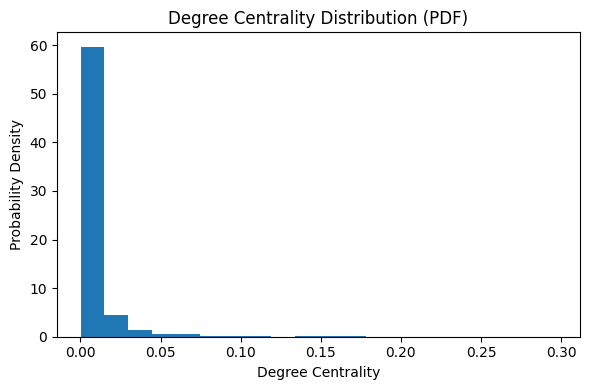

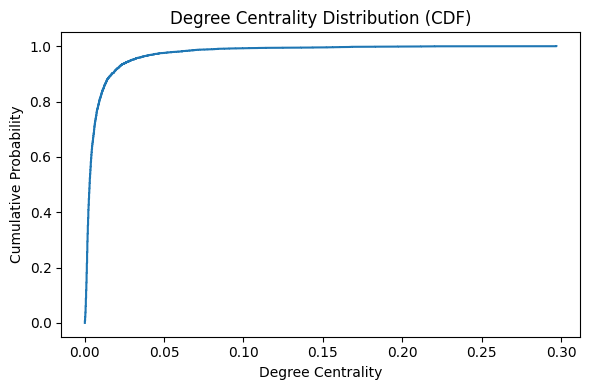

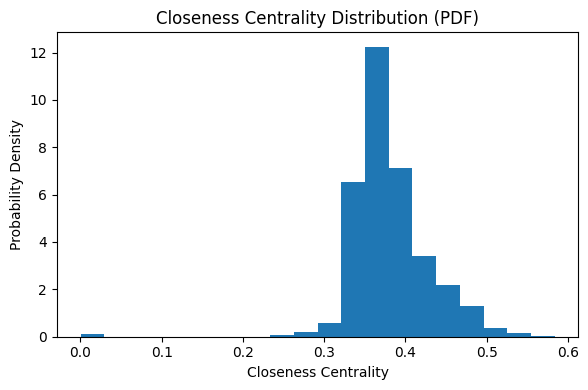

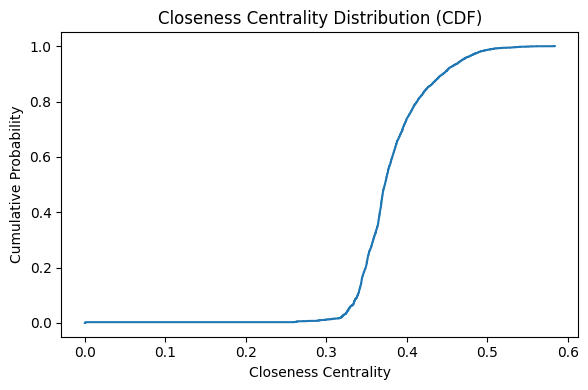

In [26]:
# 6/
deg_cent = nx.degree_centrality(G)
clo_cent = nx.closeness_centrality(G)

deg_vals = np.array(list(deg_cent.values()))
clo_vals = np.array(list(clo_cent.values()))

# --- Degree Centrality PDF ---
plt.figure(figsize=(6,4))
plt.hist(deg_vals, bins=20, density=True)
plt.xlabel('Degree Centrality')
plt.ylabel('Probability Density')
plt.title('Degree Centrality Distribution (PDF)')
plt.tight_layout()
plt.show()

# --- Degree Centrality CDF ---
sorted_deg = np.sort(deg_vals)
cdf_deg = np.arange(1, len(sorted_deg)+1) / len(sorted_deg)
plt.figure(figsize=(6,4))
plt.step(sorted_deg, cdf_deg, where='post')
plt.xlabel('Degree Centrality')
plt.ylabel('Cumulative Probability')
plt.title('Degree Centrality Distribution (CDF)')
plt.tight_layout()
plt.show()

# --- Closeness Centrality PDF ---
plt.figure(figsize=(6,4))
plt.hist(clo_vals, bins=20, density=True)
plt.xlabel('Closeness Centrality')
plt.ylabel('Probability Density')
plt.title('Closeness Centrality Distribution (PDF)')
plt.tight_layout()
plt.show()

# --- Closeness Centrality CDF ---
sorted_clo = np.sort(clo_vals)
cdf_clo = np.arange(1, len(sorted_clo)+1) / len(sorted_clo)
plt.figure(figsize=(6,4))
plt.step(sorted_clo, cdf_clo, where='post')
plt.xlabel('Closeness Centrality')
plt.ylabel('Cumulative Probability')
plt.title('Closeness Centrality Distribution (CDF)')
plt.tight_layout()
plt.show()

In [27]:
# 7/
import sqlite3
import pandas as pd

clust_dict = nx.clustering(G) 

# Save to SQLite database
db_path = 'clustering_alt.db'
conn = sqlite3.connect(db_path)
c = conn.cursor()

c.execute('''
    CREATE TABLE IF NOT EXISTS node_clustering (
        node TEXT PRIMARY KEY,
        clustering_coeff REAL
    )
''')

rows = [(str(node), float(coeff)) for node, coeff in clust_dict.items()]
c.executemany('''
    INSERT OR REPLACE INTO node_clustering (node, clustering_coeff)
    VALUES (?, ?)
''', rows)

conn.commit()
conn.close()

print(f"Saved clustering coefficients for {len(rows)} nodes to '{db_path}'.")

# --- Save to CSV file ---
clust_df = pd.DataFrame(rows, columns=['node', 'clustering_coeff'])
clust_df_sorted = clust_df.sort_values(by='clustering_coeff', ascending=False)
clust_df_sorted.to_csv('clustering_coefficients.csv', index=False)

print("Saved clustering coefficients to 'clustering_coefficients.csv'.")


Saved clustering coefficients for 6426 nodes to 'clustering_alt.db'.
Saved clustering coefficients to 'clustering_coefficients.csv'.


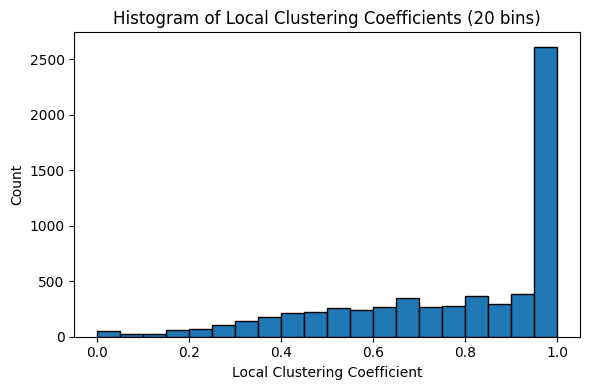

Fitted power‑law:  p(x) ∝ x^(-1.370),  xmin=0.049
Empirical R² of the power‑law fit: -0.6664


In [28]:
# 8/
import powerlaw
values = np.array(list(clust_dict.values()))

bins = np.linspace(0, 1, 21)
plt.figure(figsize=(6,4))
plt.hist(values, bins=bins, edgecolor='black')
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Count')
plt.title('Histogram of Local Clustering Coefficients (20 bins)')
plt.tight_layout()
plt.show()

data = values[values > 0]
fit = powerlaw.Fit(data, xmin=data.min())  
alpha = fit.power_law.alpha
xmin  = fit.power_law.xmin
print(f"Fitted power‑law:  p(x) ∝ x^(-{alpha:.3f}),  xmin={xmin:.3f}")

hist, bin_edges = np.histogram(data, bins=20, range=(xmin, data.max()), density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

C = (alpha - 1) * xmin**(alpha - 1)
pdf_theo = C * bin_centers**(-alpha)

y_obs = hist
y_pred = pdf_theo
ss_res = np.sum((y_obs - y_pred)**2)
ss_tot = np.sum((y_obs - y_obs.mean())**2)
r_squared = 1 - ss_res / ss_tot
print(f"Empirical R² of the power‑law fit: {r_squared:.4f}")

In [ ]:
#9/
# Compute Hubs and Authorities
hubs, authorities = nx.hits(G, max_iter=1000, normalized=True)

# Convert to DataFrames (optional, for inspection or saving)
import pandas as pd

hits_df = pd.DataFrame({
    'node': list(hubs.keys()),
    'hub_score': list(hubs.values()),
    'authority_score': list(authorities.values())
})

# Sort by highest authority
top_authorities = hits_df.sort_values(by='authority_score', ascending=False).head(10)

# Sort by highest hub
top_hubs = hits_df.sort_values(by='hub_score', ascending=False).head(10)

print("Top 10 Authorities:")
print(top_authorities[['node', 'authority_score']])

print("\nTop 10 Hubs:")
print(top_hubs[['node', 'hub_score']])


Top 10 Authorities:
                     node  authority_score
60        CAPTAIN AMERICA         0.003005
6    IRON MAN/TONY STARK          0.002639
57   SCARLET WITCH/WANDA          0.002595
79   THING/BENJAMIN J. GR         0.002594
48   SPIDER-MAN/PETER PAR         0.002580
74   MR. FANTASTIC/REED R         0.002567
67                VISION          0.002536
183  HUMAN TORCH/JOHNNY S         0.002536
65       WOLVERINE/LOGAN          0.002532
84   BEAST/HENRY &HANK& P         0.002458

Top 10 Hubs:
                     node  hub_score
60        CAPTAIN AMERICA   0.003005
6    IRON MAN/TONY STARK    0.002639
57   SCARLET WITCH/WANDA    0.002595
79   THING/BENJAMIN J. GR   0.002594
48   SPIDER-MAN/PETER PAR   0.002580
74   MR. FANTASTIC/REED R   0.002567
67                VISION    0.002536
183  HUMAN TORCH/JOHNNY S   0.002536
65       WOLVERINE/LOGAN    0.002532
84   BEAST/HENRY &HANK& P   0.002458


In [30]:
#10/
# Run Label Propagation to detect communities
communities = list(nx.algorithms.community.label_propagation_communities(G))

# Map node → community index
node_to_community = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_to_community[node] = i

# Centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Prepare summary for each community
summary_data = []

for i, comm in enumerate(communities):
    subgraph = G.subgraph(comm)
    sub_deg_centrality = [degree_centrality[n] for n in subgraph.nodes]
    sub_close_centrality = [closeness_centrality[n] for n in subgraph.nodes]
    
    transitivity = nx.transitivity(subgraph)  # global clustering coefficient

    summary_data.append({
        'Community': i,
        'Num Nodes': len(comm),
        'Transitivity': round(transitivity, 4),
        'Avg Degree Centrality': round(pd.Series(sub_deg_centrality).mean(), 5),
        'Std Degree Centrality': round(pd.Series(sub_deg_centrality).std(), 5),
        'Avg Closeness Centrality': round(pd.Series(sub_close_centrality).mean(), 5),
        'Std Closeness Centrality': round(pd.Series(sub_close_centrality).std(), 5),
    })

# Convert to DataFrame
summary_df = pd.DataFrame(summary_data)

# Sort by community ID or number of nodes if desired
summary_df.sort_values(by='Num Nodes', ascending=False, inplace=True)

# Display the summary table
print(summary_df.to_string(index=False))


 Community  Num Nodes  Transitivity  Avg Degree Centrality  Std Degree Centrality  Avg Closeness Centrality  Std Closeness Centrality
         0       5627        0.1966                0.00889                0.01875                   0.38795                   0.04178
        21        118        0.6582                0.00594                0.00412                   0.34573                   0.00468
        35         45        0.6579                0.00499                0.00293                   0.36706                   0.02807
         3         40        0.6577                0.00275                0.00128                   0.34366                   0.00475
         9         33        0.7752                0.00459                0.00203                   0.35969                   0.01177
        32         32        0.6000                0.00204                0.00135                   0.33195                   0.03784
         1         30        0.8383                0.00341    